# Sequence evaluation

computing the error from the sequence that is given from the pathgen module.

or in evolutionary computing literature it is called fitness computing.

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## modules

In [2]:
# point1 and point2 are paired tuples from a standard image matrix.
# standard image matrix means that coordinates are (rows, columns) 
# and the coordinate center is at the top-left of the image (0,0)
def draw_line(estimated_image, point1, point2):
    # i+0.5 = m(j+0.5) + b or i-i0-0.5 = m(j-j0-0.5)
    # j = column number
    # i = row number
    h_dir = np.sign(point2[1] - point1[1]) # horizontal direction 
    v_dir = np.sign(point2[0] - point1[0]) # vertical direction
    #  1 is the positive direction (x1 - x0)>0
    # -1 is the negative direction (x1 - x0)<0
    # reminder: x/abs(x) = sign(x)
    
    if(point2[1]-point1[1]==0): # to avoid division by zero
        for i in range(point2[0]-point1[0]):
            v_offset = i*v_dir
            estimated_image[point1[0]+v_offset][point1[1]] = 0
    elif(point2[0]-point1[0]==0):
        for j in range(point2[1]-point1[1]==0):
            h_offset = j*h_dir
            estimated_image[point1[0]][point1[1]+h_offset] = 0
    else:
        m = (point2[0] - point1[0]) / (point2[1] - point1[1])
        for i in range(abs(point2[0]-point1[0])+1):
            for j in range(abs(point2[1]-point1[1])+1):
                # ignoring the end points of the line.
                h_offset = j*h_dir
                v_offset = i*v_dir
                if(h_offset==0 and v_offset==0):
                    continue
                if(point1[1]+ h_offset== point2[1] and point1[0]+ v_offset== point2[0]):
                    continue
                for hc in range(2):
                    for vc in range(2):
                        i_online = (point1[1]+hc+h_offset - (point1[1]+0.5))*m + (point1[0]+0.5)
                        j_online = (point1[0]+vc+v_offset - (point1[0]+0.5))/m + (point1[1]+0.5)
                        if((point1[0]+ v_offset <= i_online and i_online <= point1[0]+ v_offset+ v_dir) 
                           or (point1[1]+ h_offset <= j_online and j_online <= point1[1]+ h_offset+ h_dir)):
                            estimated_image[ point1[0]+v_offset ][ point1[1]+h_offset ] = 0
    

In [3]:
# the sequence is a series of paired tuples that have the order of the desired picture.
# this order is further used to draw a picture on the paper.
# we are using MSE because the values are normalized between 1 and 0 
# so the pixels whose shades are close to black  become lesser value by getting squared.
def seqeval_MSE(sequence, img_size, desired_image):
    estimated_image = np.ones([img_size,img_size], dtype=int)
    # 2 = white
    # 0 = black
    # not 255 in order to avoid large number of variances.
    # not 1 in order to make use of the variance and not just absolute function of errors.
    
    # normalize the input data
    max_intensity = np.max(desired_image)
    normalized_desired = desired_image/max_intensity
    
    for i in range(len(sequence)-1):
        first_point = sequence[i] 
        consecutive_point = sequence[i+1]
        draw_line(estimated_image, first_point, consecutive_point)
    
    for i in range(len(sequence)):
        estimated_image[sequence[i]] = 0
        
    
    # --------- outputting and logging and testing some of the results.
    norm_estimate = estimated_image*255
    norm_estimate //= 1
    plt.figure()
    plt.imshow(norm_estimate,cmap='gray')
    plt.axis("off")
    
    error = estimated_image - normalized_desired
    MSE = np.sum(error**2)
    return MSE

## testing the evaluation module

27.0

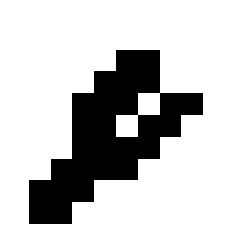

In [5]:
seqeval_MSE([(5,3), (2,6), (9,1), (4,8)], 10, np.ones([10,10])*255)

2.0

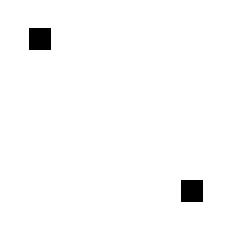

In [7]:
seqeval_MSE([(8,8), (1,1)], 10, np.ones([10,10])*255)

56.0

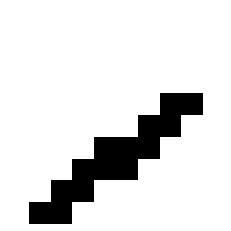

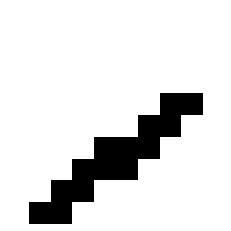

In [209]:
seqeval_MSE2([(9,1), (4,8)], 10, np.ones([10,10])*255)
seqeval_MSE2([(4,8), (9,1)], 10, np.ones([10,10])*255)